In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Rating

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/ratings.dat',names = columns, sep ='::')
ratings.head(20)

<ipython-input-2-327c0bb31ab9>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/ratings.dat',names = columns, sep ='::')


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [4]:
ratings["user_id"].value_counts()

,count
user_id,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521
...,...
5725,20
3407,20
1664,20


Since the userID have 6040 rows means there are 6040 users in this dataset. The ID 4169 rated 2314 movies which also the highest person, some of them only have the minimum number : 20 ratings.

In [5]:
ratings["movie_id"].value_counts()

,count
movie_id,
2858,3428
260,2991
1196,2990
1210,2883
480,2672
...,...
3458,1
2226,1
1815,1


MovieID contains 3706 rows which also means there are 3706 movies in this dataset. The movie 2858 has the highest count of ratings (3428) and some of them only have 1 rating.

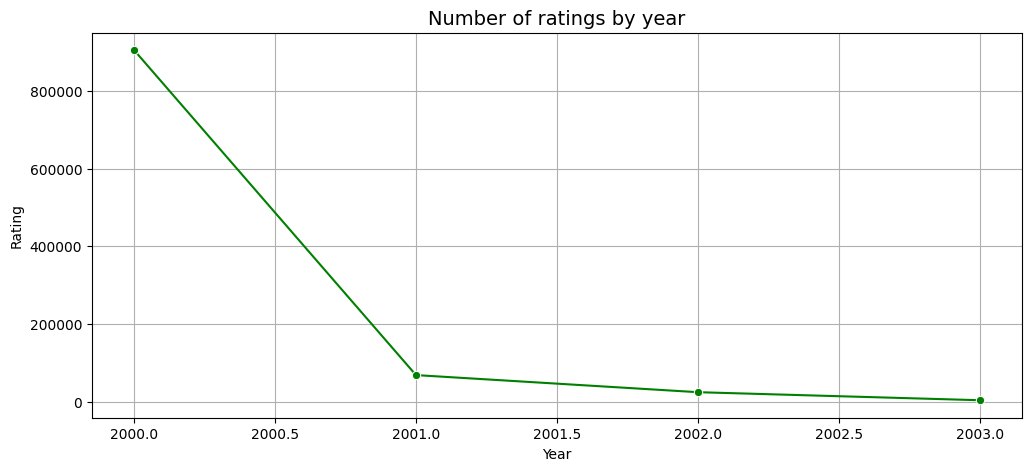

,count
Date,
2000,904757
2001,68058
2002,24046
2003,3348


In [6]:
ratings["Date"] = pd.to_datetime(ratings["timestamp"], unit="s")

# Nhóm theo năm và đếm số lượng đánh giá
ratings_per_year = ratings["Date"].dt.year.value_counts().sort_index()

# Vẽ xu hướng số lượng đánh giá theo năm
plt.figure(figsize=(12, 5))
sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values, marker="o", color="green")
plt.title("Number of ratings by year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

# Trả về thống kê theo năm
ratings_per_year


The number of ratings decreased by years. From 904757 in 2000 to 3348 in 2003. phim mới it rate hơn.

# User

In [7]:
user_column = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/users.dat',names = user_column, sep ='::')
users.head(10)

<ipython-input-7-8fce37028f52>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/users.dat',names = user_column, sep ='::')


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [ ]:
users["gender"].value_counts()

,count
gender,
M,4331
F,1709


There are more men than women in this data.


<Axes: >

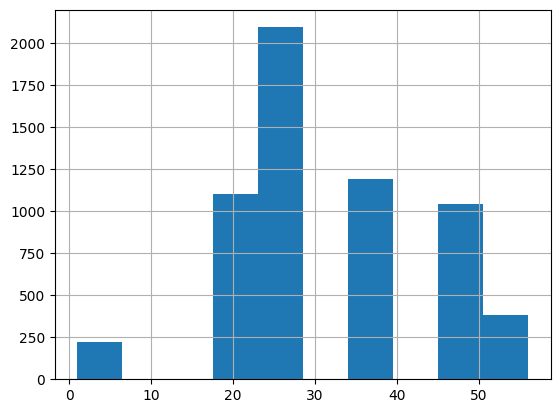

In [ ]:
users["age"].hist()

The user are mostly from the age 18-25 and 25-34. We can predict this since young people are more likely to watch movies than teenager or ederly.

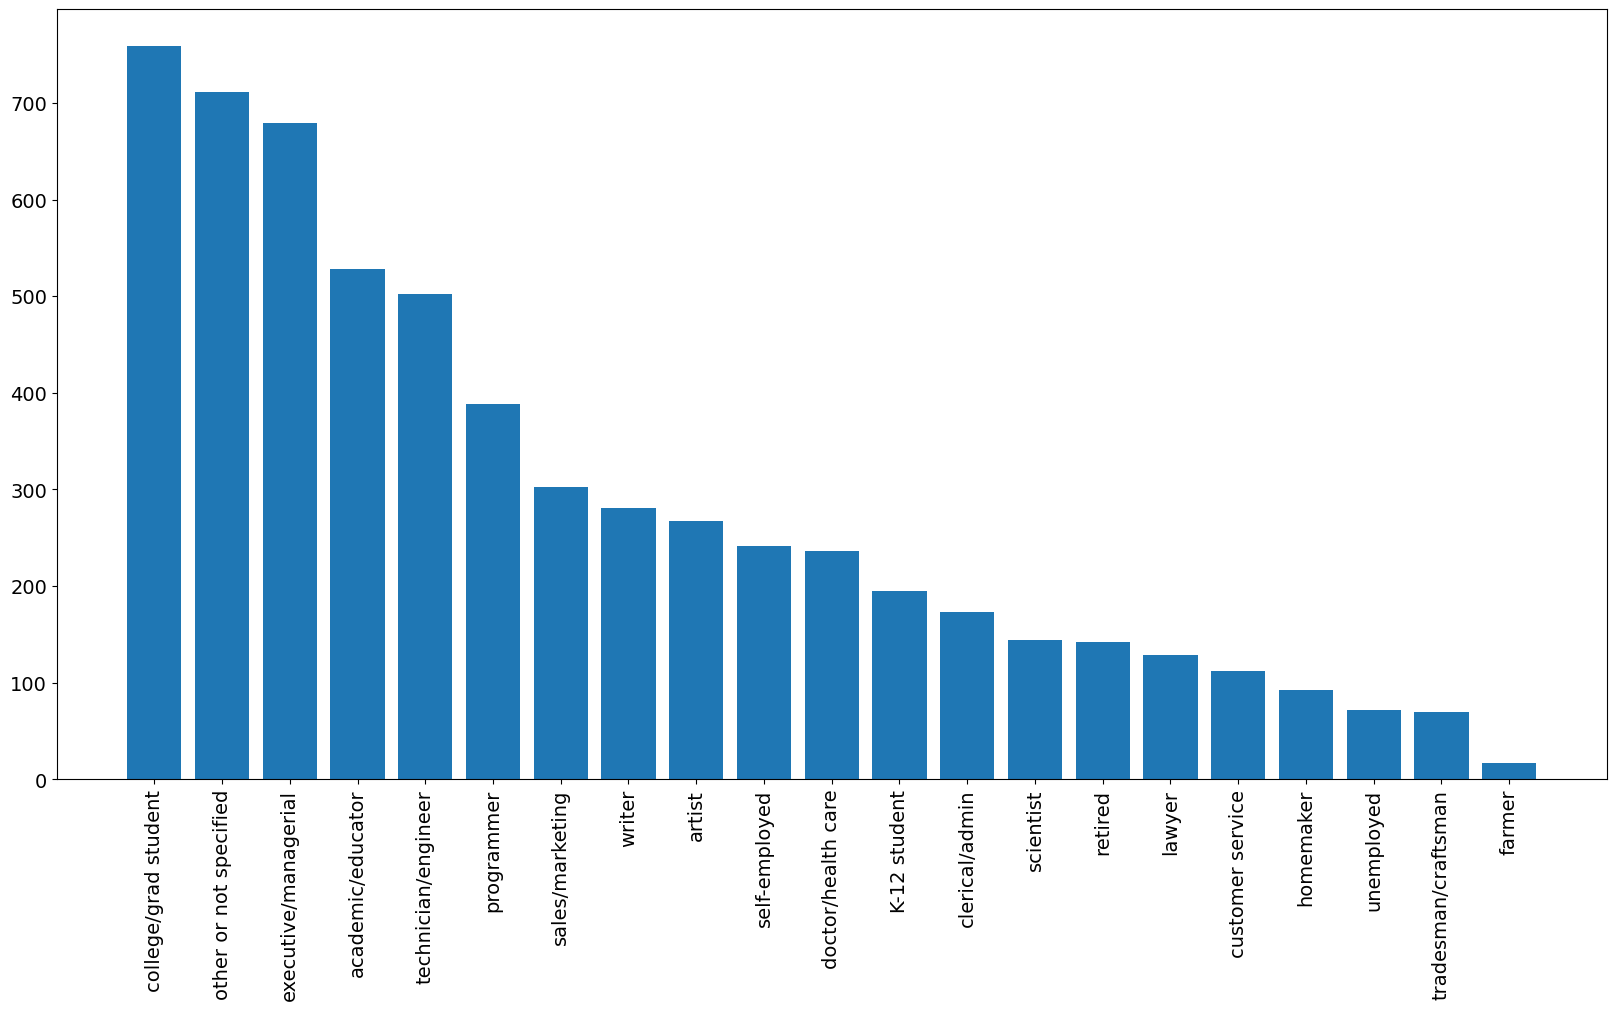

In [ ]:
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users["occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


plt.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.show()

As expected from the age range, the college/grad student take the most part.

# Movie

In [8]:
movie_column = ['movie_id', 'title', 'genres']
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/movies.dat', names = movie_column, sep ='::', encoding='latin-1')
movies.head(10)

<ipython-input-8-2e04fe5db939>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-1m/movies.dat', names = movie_column, sep ='::', encoding='latin-1')


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
movies["num_genres"] = movies["genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

,count
num_genres,
1,2025
2,1322
3,421
4,100
5,14
6,1


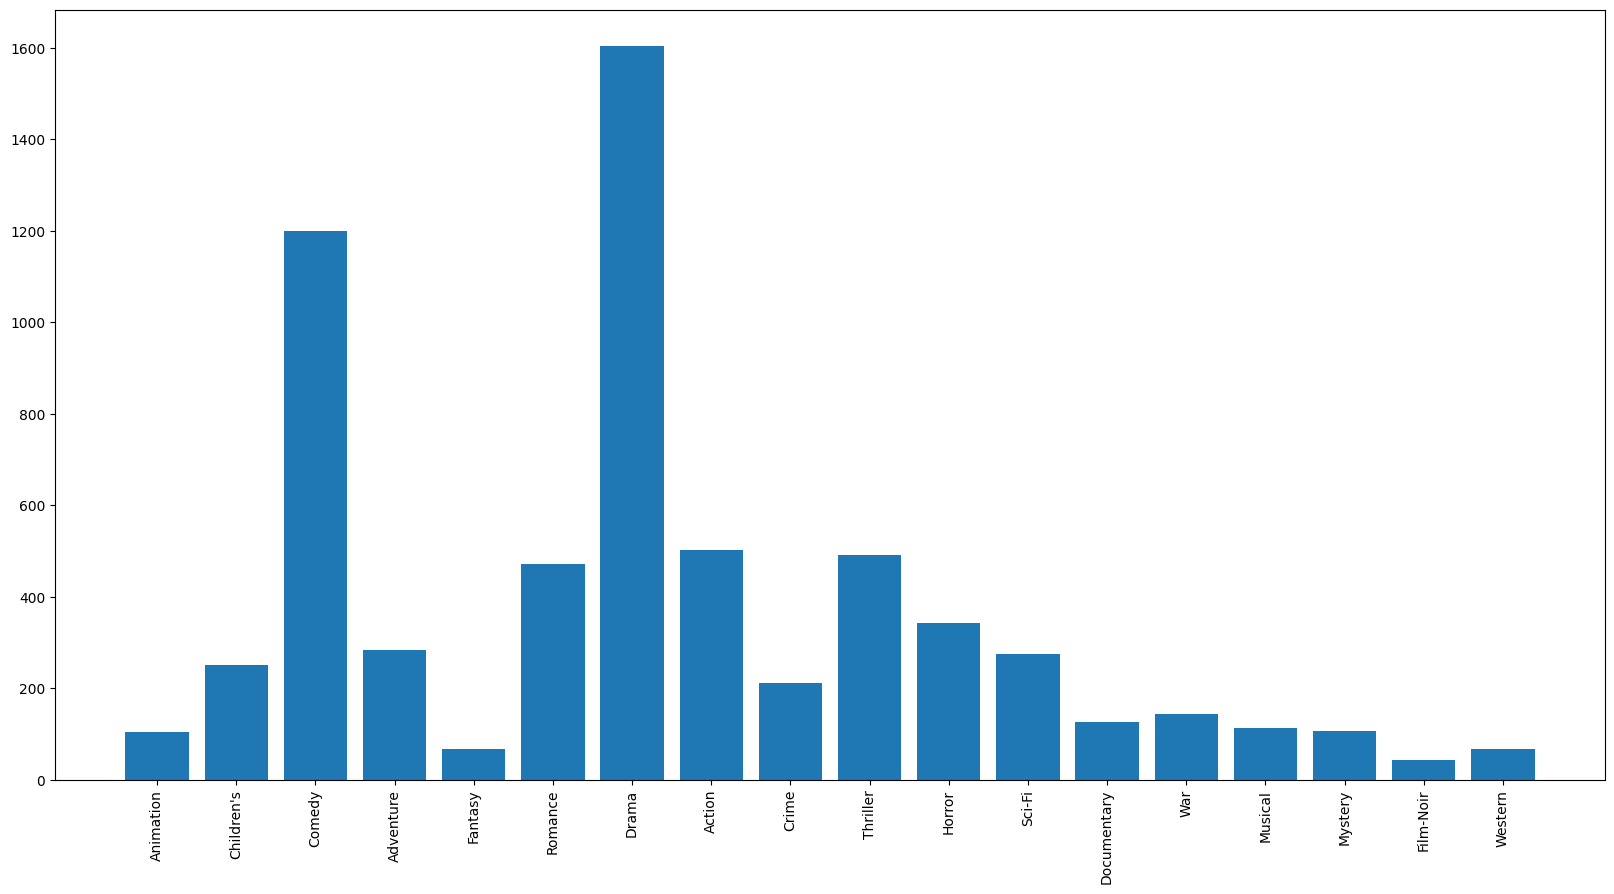

In [52]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["genres"]:
    num_genres = genre_str.split('|')
    for genre in num_genres:
        genres_counter[genre] += 1

plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.show();



There are 18 genres in total and each movie can be in maximum 6 generes. From the chart, 'Drama' and 'Comedy' have the most movies with more than 1000 for each.  

# Connection between users and favourite type of movie

In [18]:
movie_rating = pd.merge(ratings, users, on = 'user_id', how = 'left')
movie_rating = pd.merge(movie_rating, movies, on = 'movie_id', how = 'left')
movie_rating.head()


,user_id,movie_id,rating,timestamp,Date,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


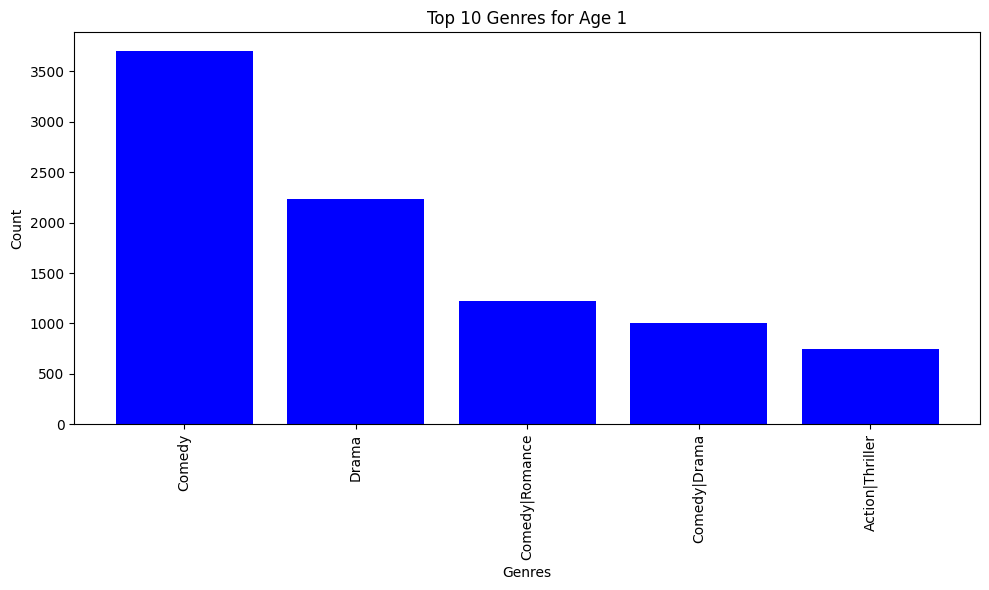

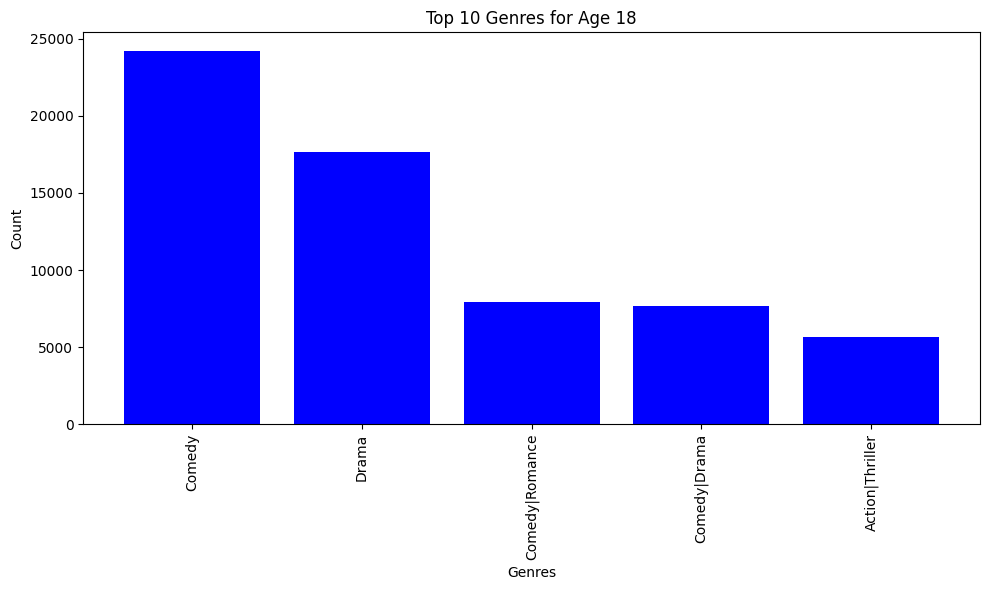

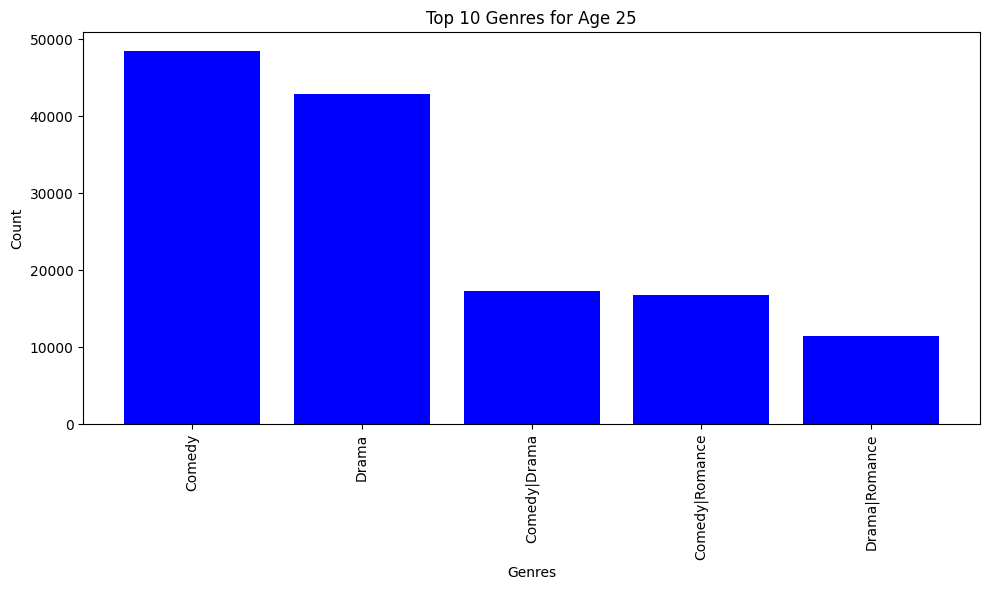

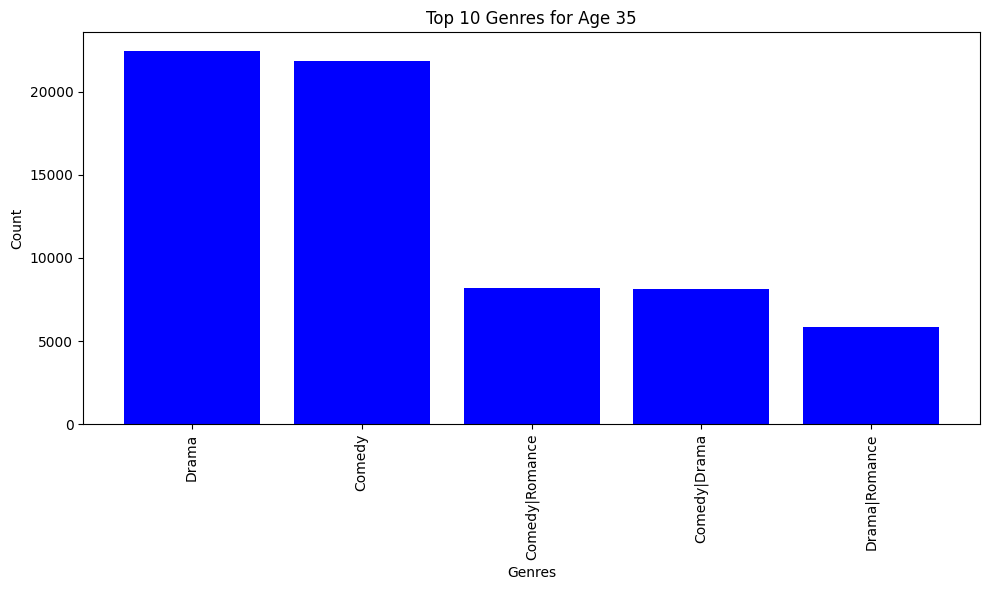

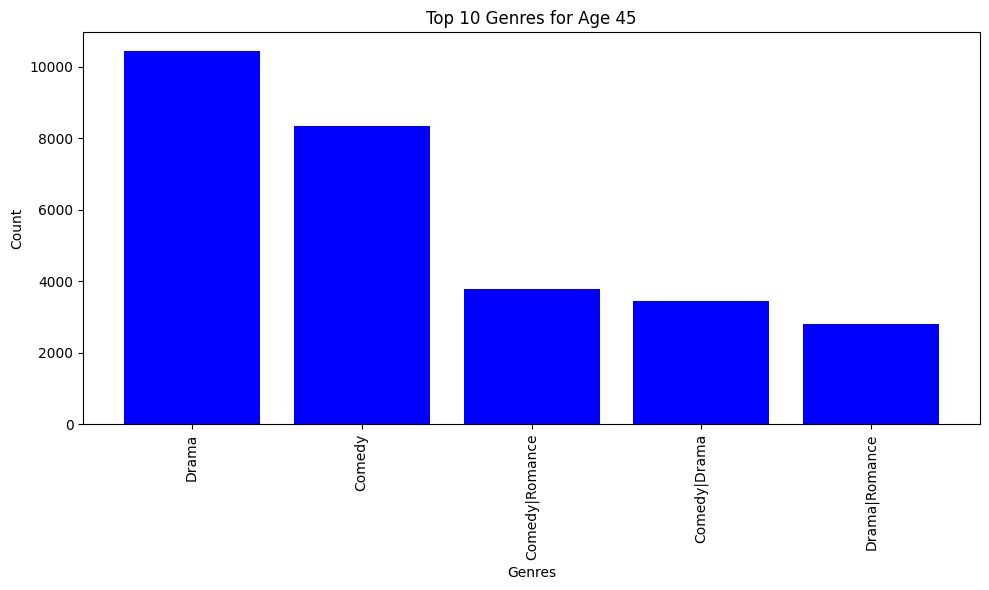

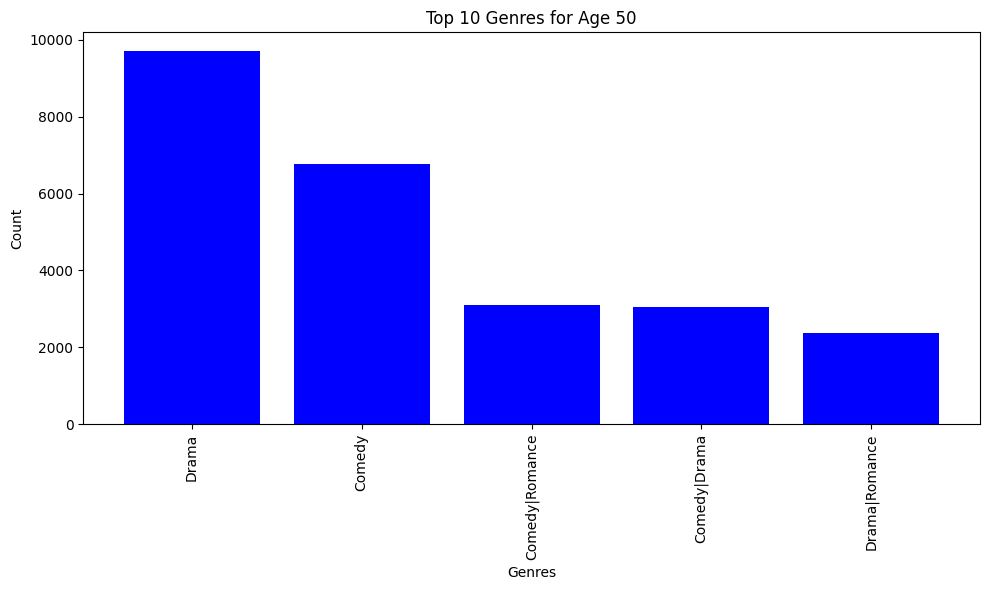

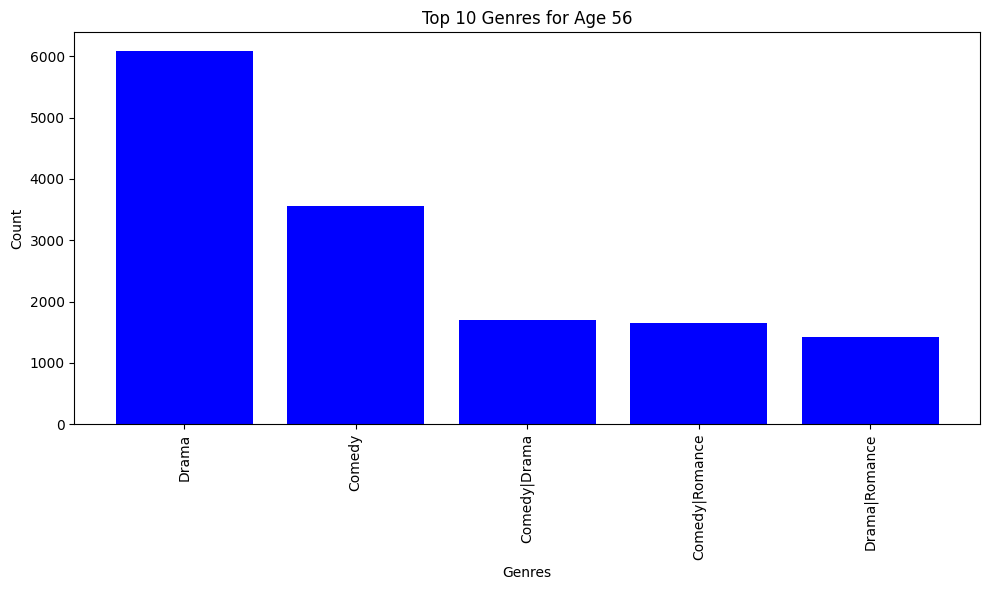

In [53]:
unique_ages = movie_rating["age"].unique()
unique_ages.sort()

for age in unique_ages:
  genre_counts = movie_rating[movie_rating['age'] == age]['genres'].value_counts().nlargest(5)
  plt.figure(figsize=(10, 6))
  plt.title(f'Top 5 Genres for Age {age}')
  plt.bar(genre_counts.index, genre_counts.values, color = 'blue')
  plt.xlabel('Genres')
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()


## The age group and their favorite genres
* In general, we can see that the top 5 favourite of all the group always have
Drama, Comedy, Comedy/Romance, Comedy/Drama.
* The last one for each of them are:
Action/Thriller for 1, 18 ;  
Drama/Romance for the rest.


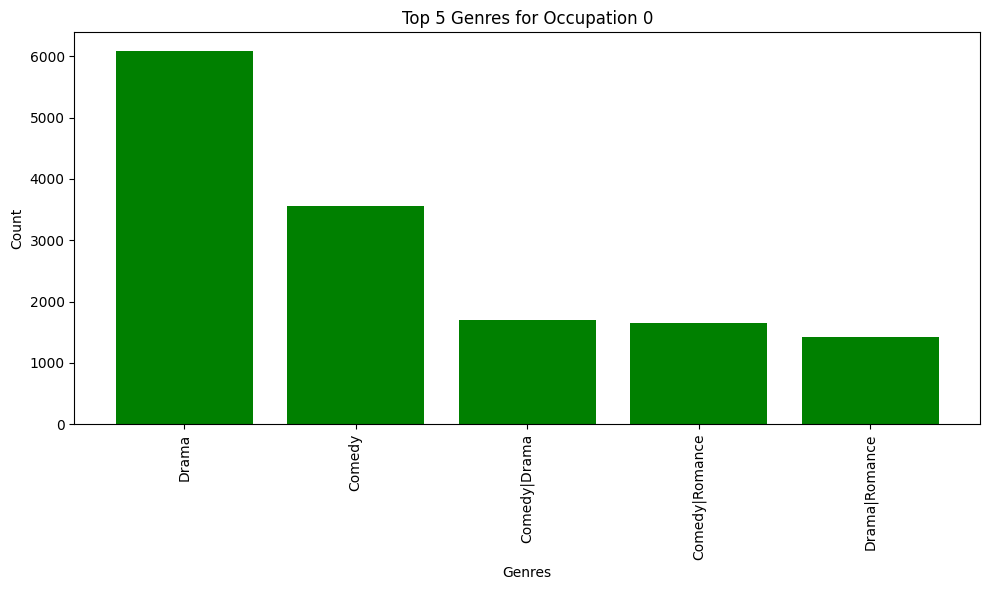

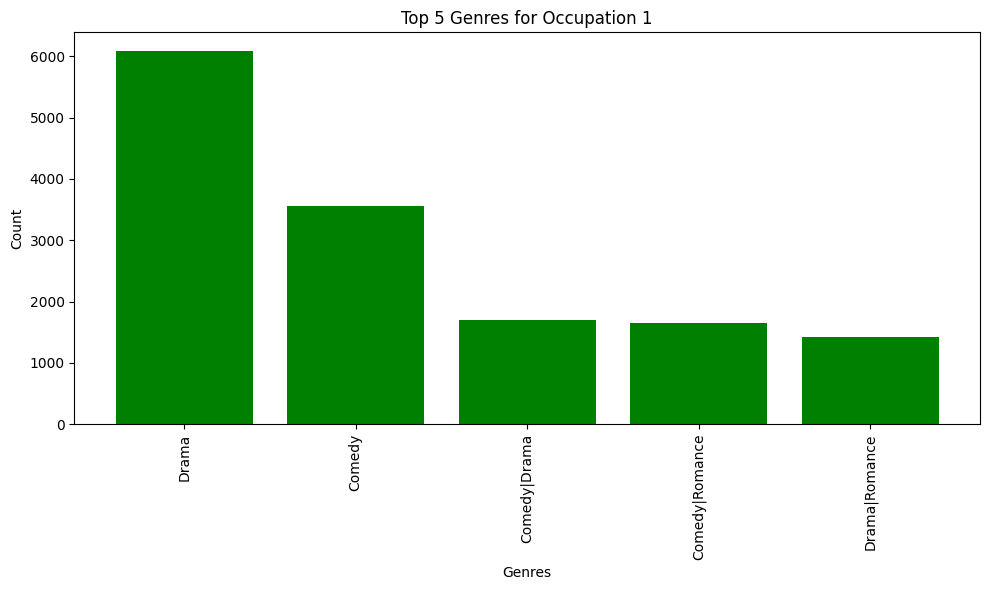

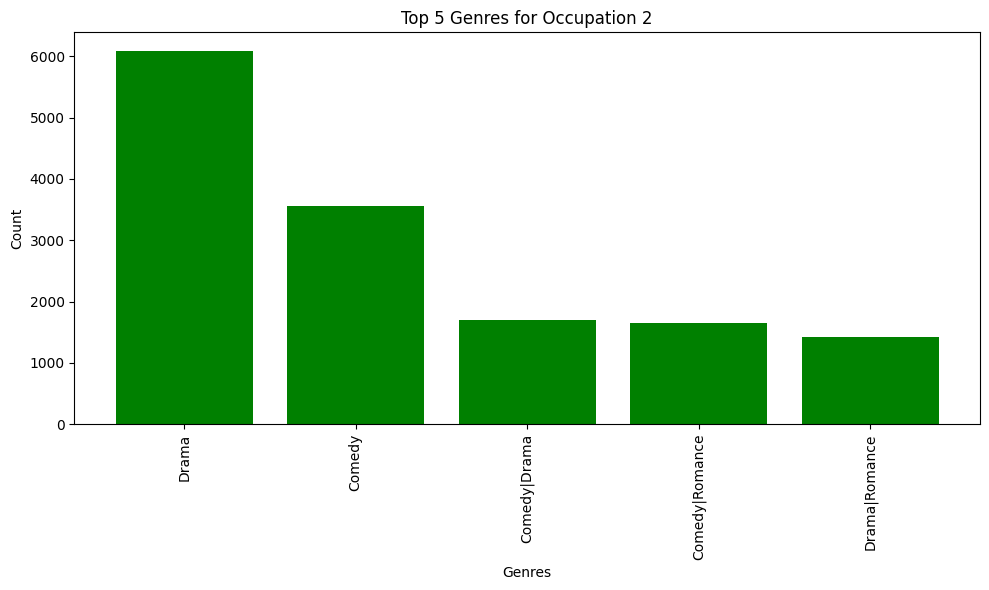

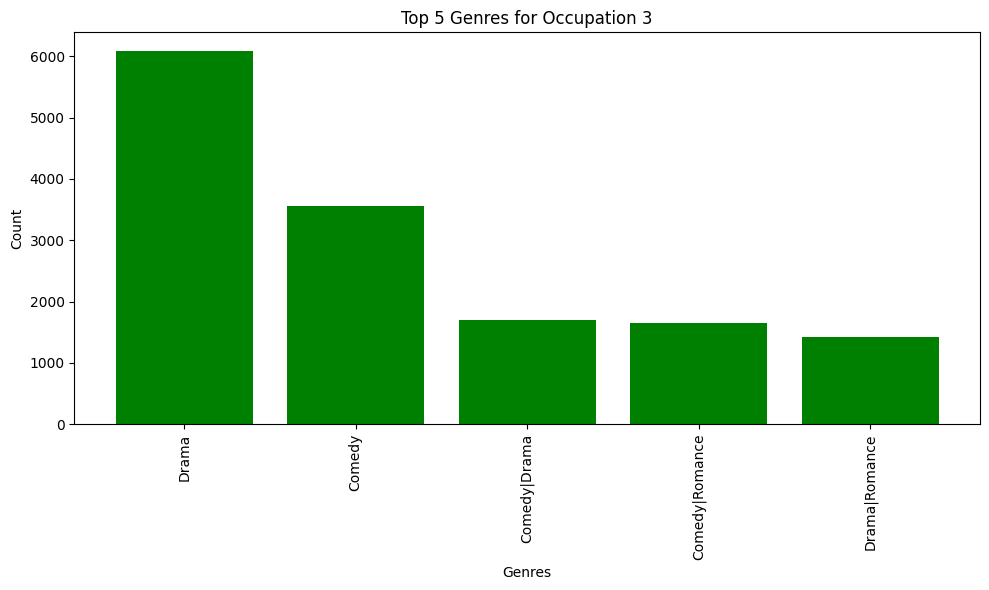

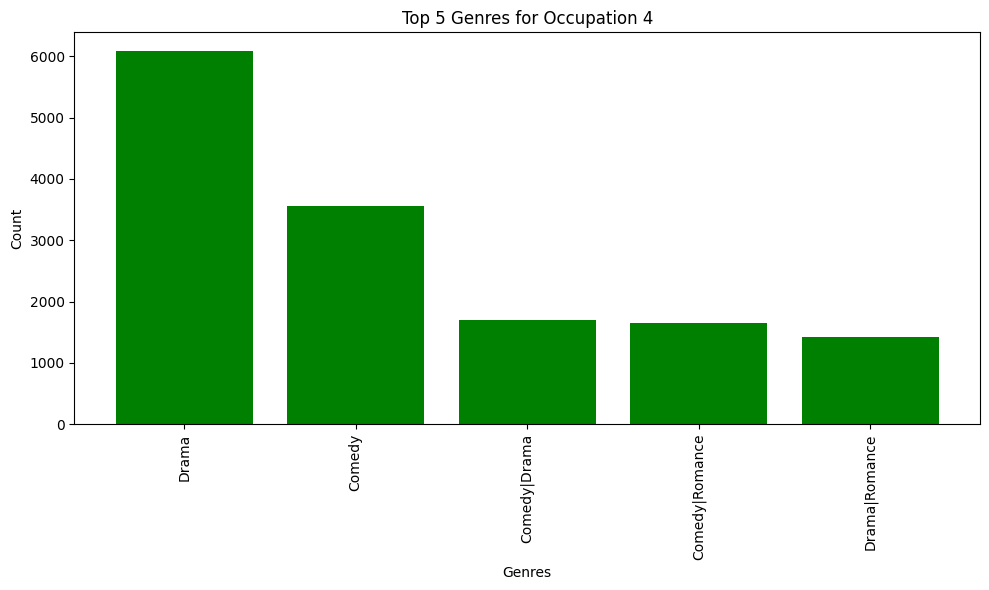

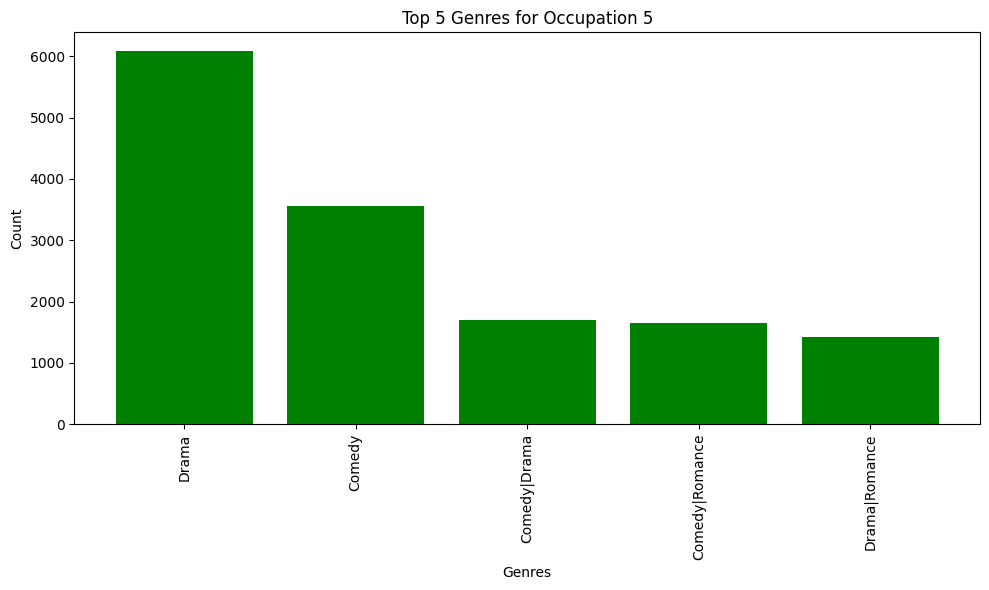

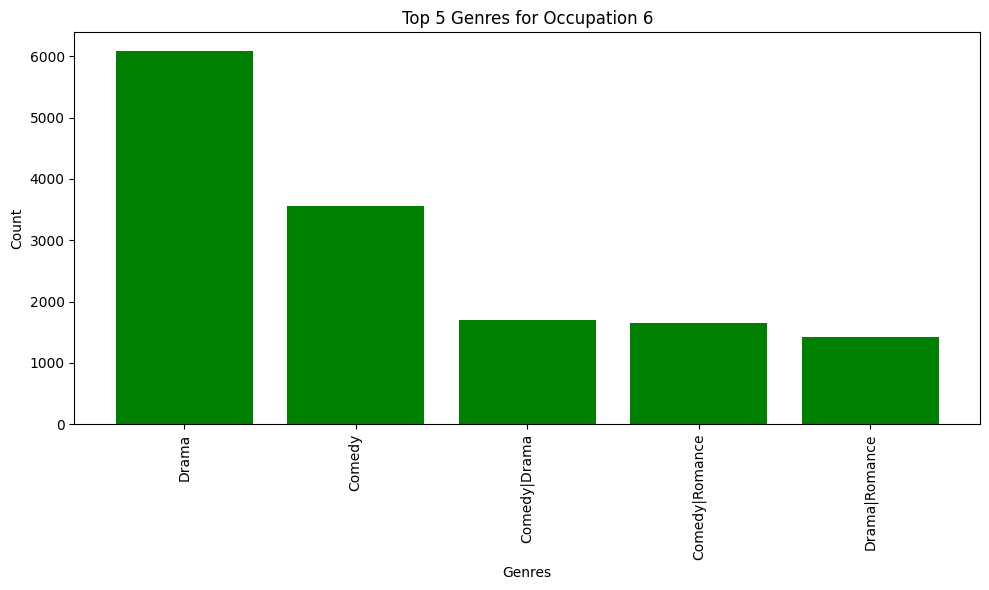

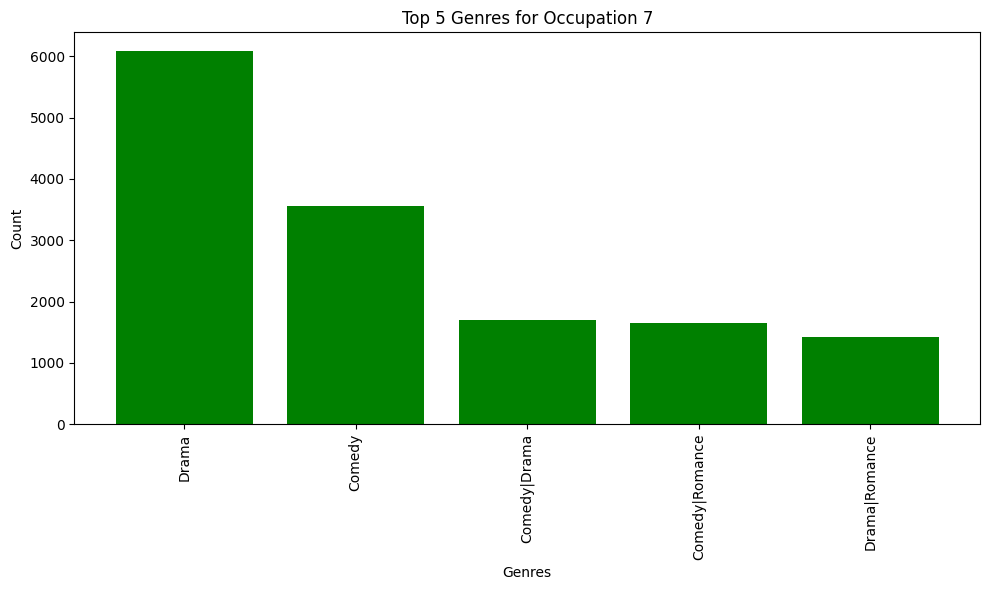

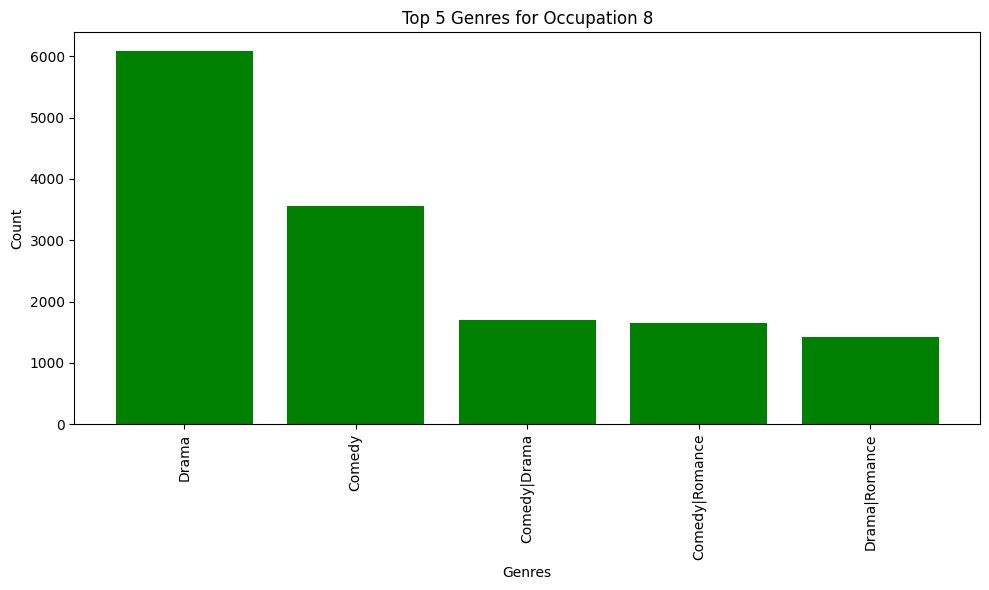

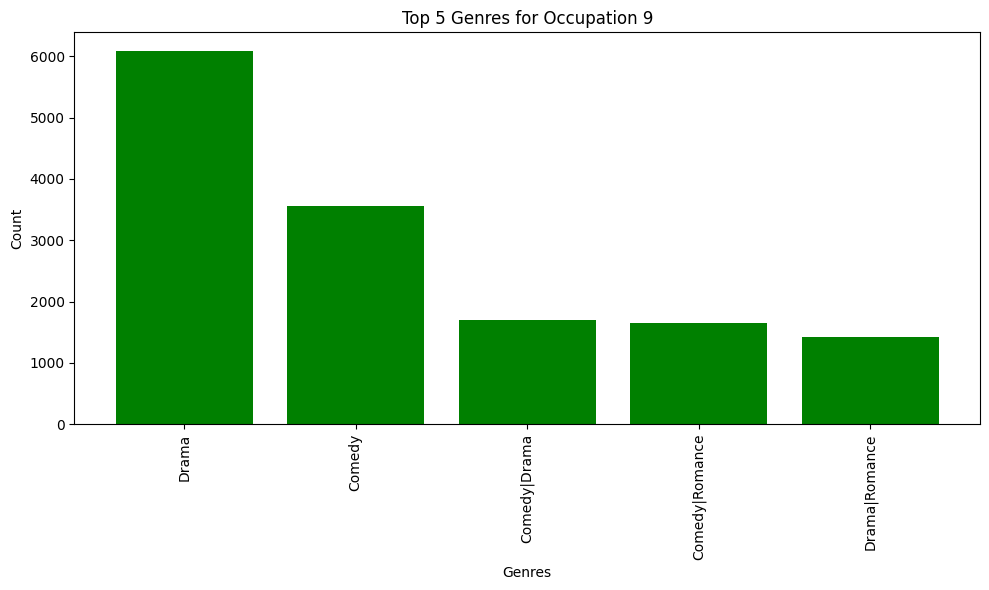

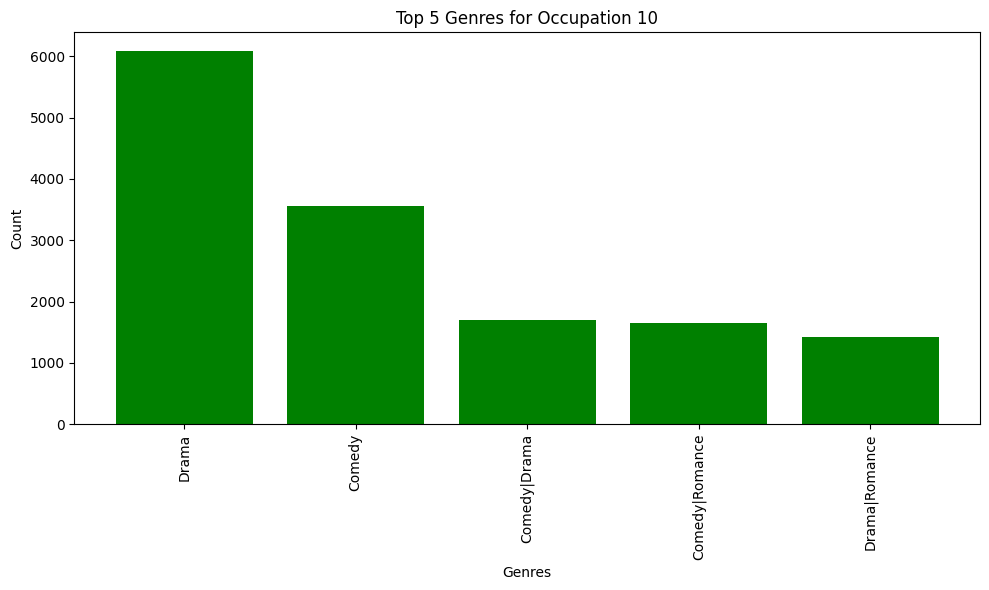

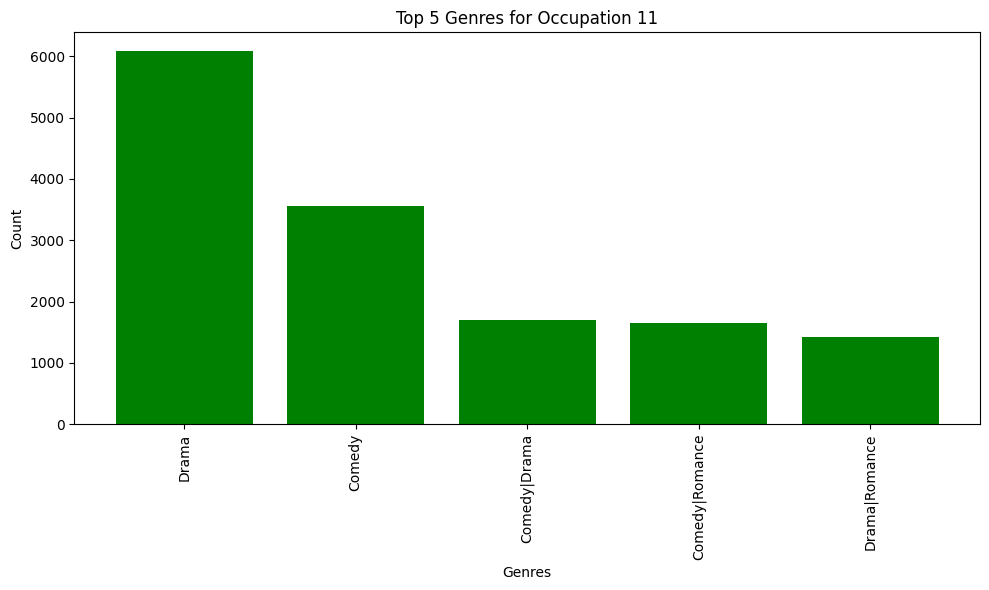

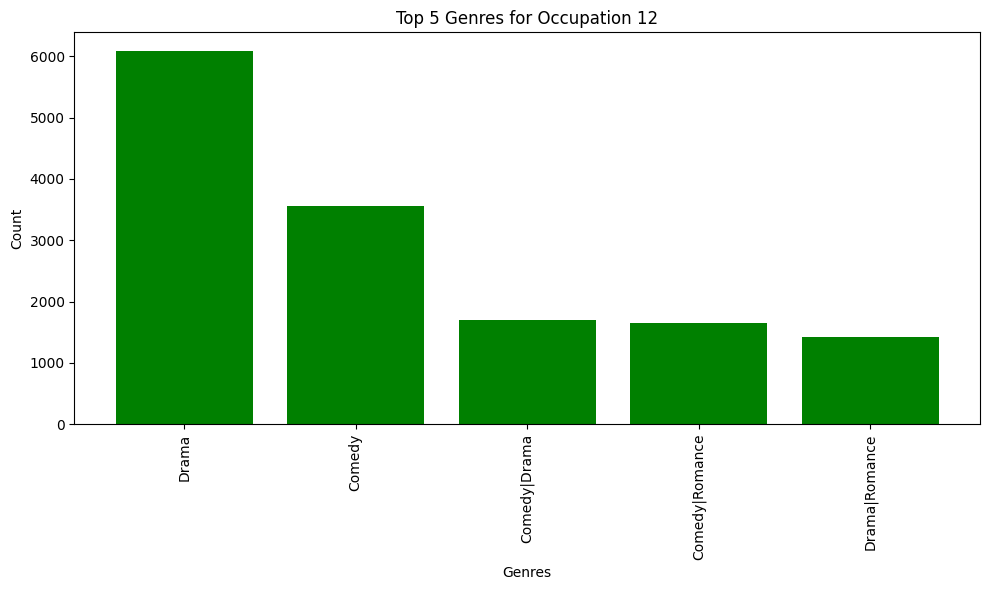

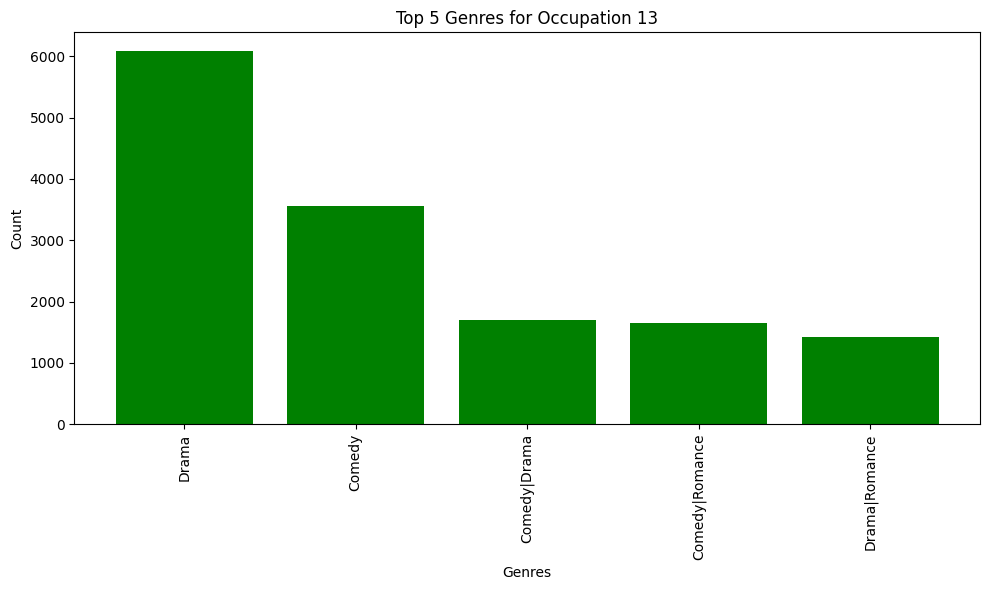

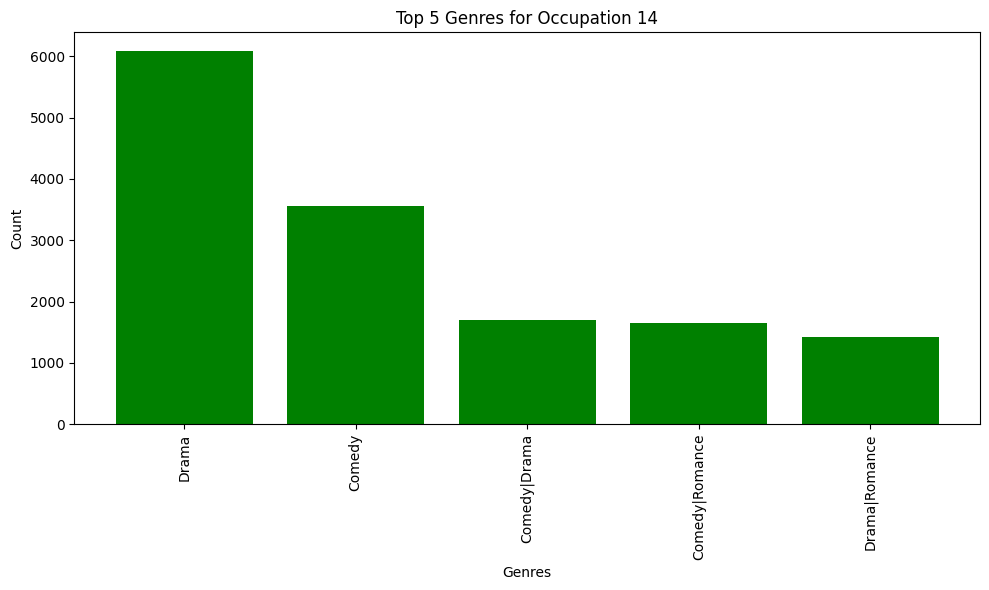

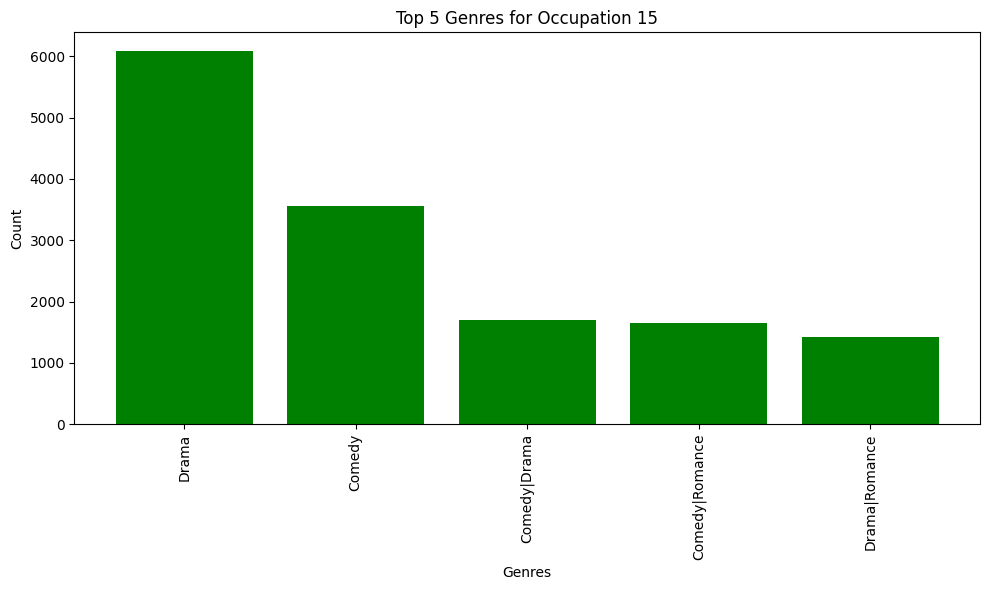

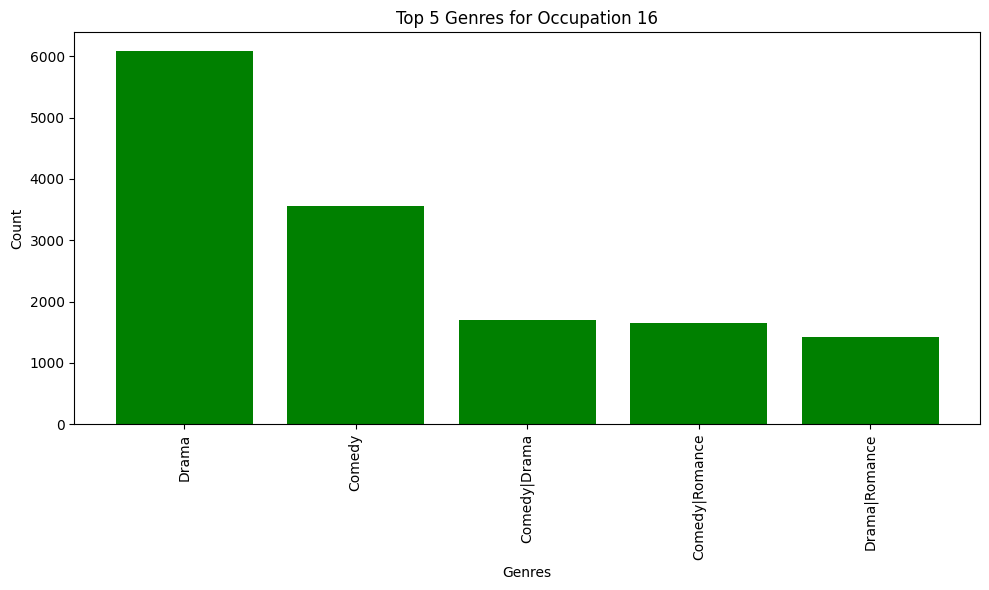

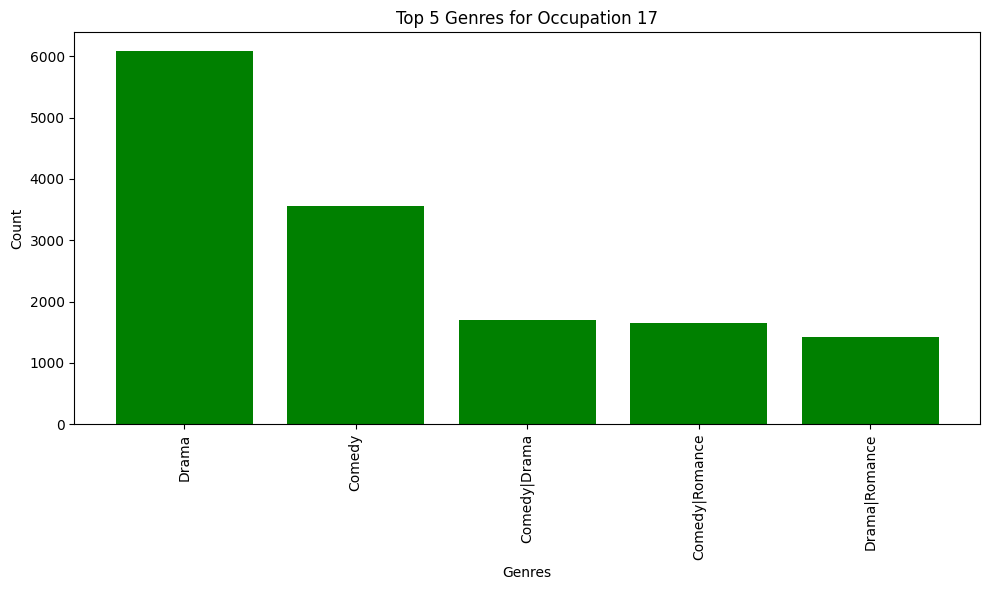

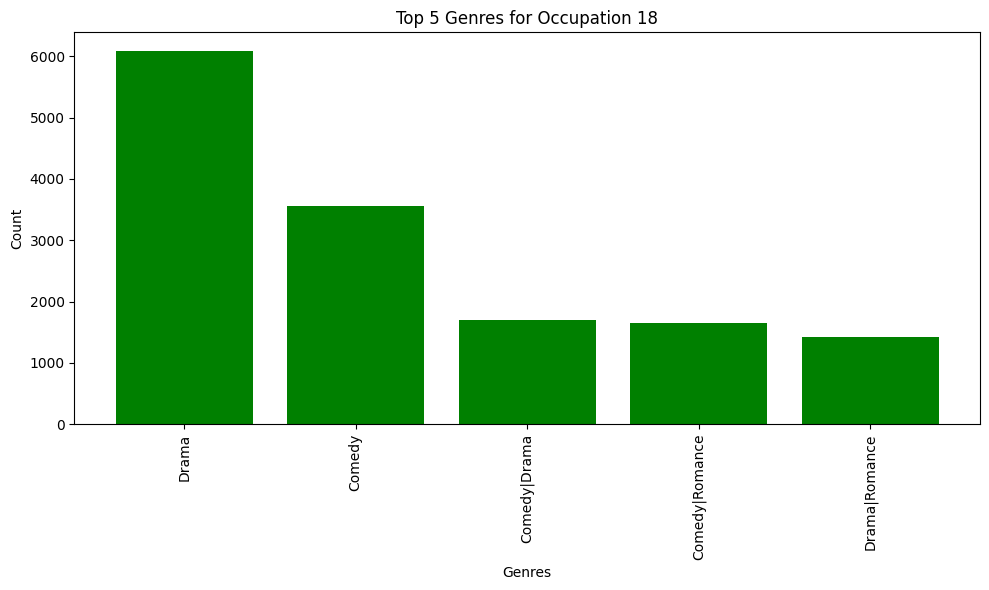

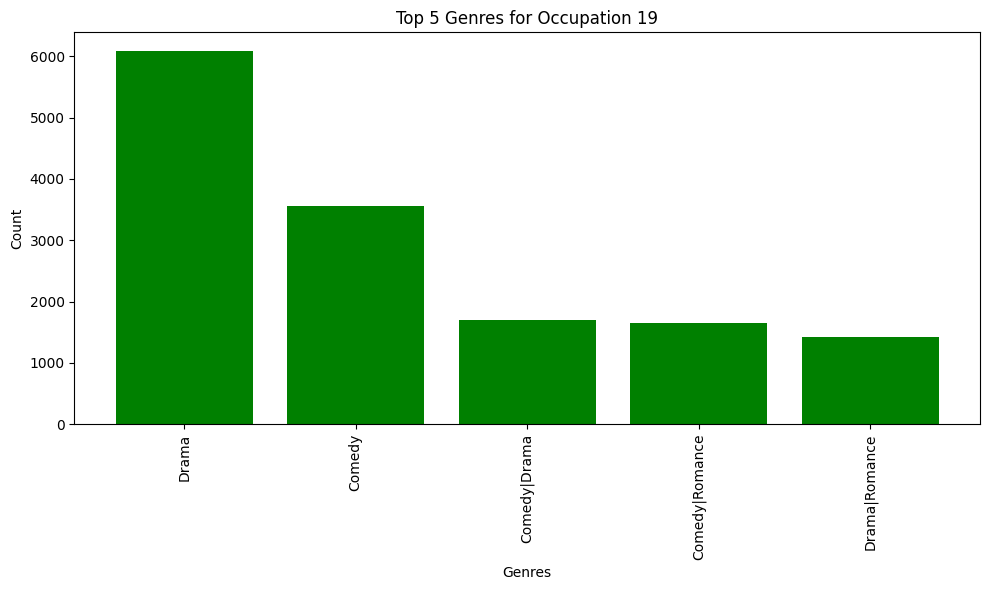

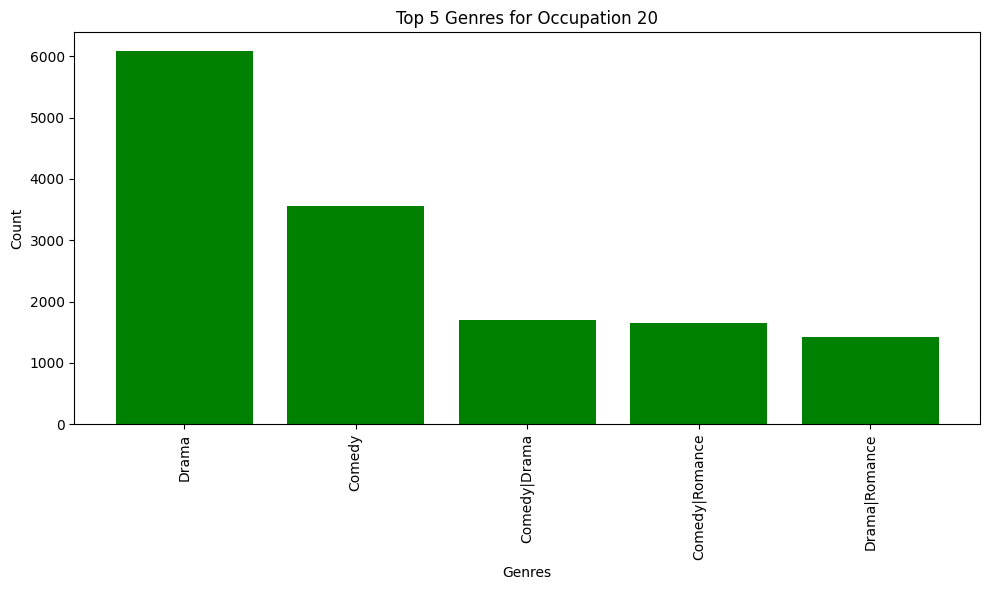

In [54]:
unique_occupation = movie_rating["occupation"].unique()
unique_occupation.sort()

for occ in unique_occupation:
  counting = movie_rating[movie_rating['occupation'] == occ]['genres'].value_counts().nlargest(5)
  plt.figure(figsize=(10, 6))
  plt.title(f'Top 5 Genres for Occupation {occ}')
  plt.bar(genre_counts.index, genre_counts.values, color = 'green')
  plt.xlabel('Genres')
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()
